In [13]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.metrics import r2_score


import os
for dirname, _, filenames in os.walk('/Users/tjeff/Desktop/CODING/project-4/Resources/test_scores.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [14]:
test_scores= pd.read_csv('/Users/tjeff/Desktop/CODING/project-4/Resources/test_scores.csv')
print(test_scores.head(5))

  school school_setting school_type classroom teaching_method  n_student  \
0  ANKYI          Urban  Non-public       6OL        Standard       20.0   
1  ANKYI          Urban  Non-public       6OL        Standard       20.0   
2  ANKYI          Urban  Non-public       6OL        Standard       20.0   
3  ANKYI          Urban  Non-public       6OL        Standard       20.0   
4  ANKYI          Urban  Non-public       6OL        Standard       20.0   

  student_id  gender             lunch  pretest  posttest  
0      2FHT3  Female  Does not qualify     62.0      72.0  
1      3JIVH  Female  Does not qualify     66.0      79.0  
2      3XOWE    Male  Does not qualify     64.0      76.0  
3      556O0  Female  Does not qualify     61.0      77.0  
4      74LOE    Male  Does not qualify     64.0      76.0  


In [15]:
print(test_scores.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2133 entries, 0 to 2132
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   school           2133 non-null   object 
 1   school_setting   2133 non-null   object 
 2   school_type      2133 non-null   object 
 3   classroom        2133 non-null   object 
 4   teaching_method  2133 non-null   object 
 5   n_student        2133 non-null   float64
 6   student_id       2133 non-null   object 
 7   gender           2133 non-null   object 
 8   lunch            2133 non-null   object 
 9   pretest          2133 non-null   float64
 10  posttest         2133 non-null   float64
dtypes: float64(3), object(8)
memory usage: 183.4+ KB
None


In [16]:
test_scores.drop(['classroom', 'n_student', 'student_id'], axis= 1, inplace= True)

<BarContainer object of 2133 artists>

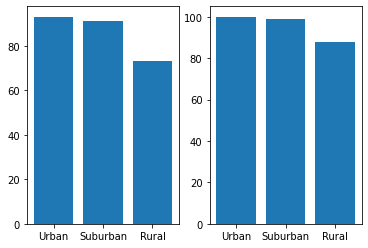

In [17]:
x = test_scores['school_setting']
y = test_scores['pretest']
plt.subplot(1, 2, 1)
plt.bar(x, y)
x = test_scores['school_setting']
y = test_scores['posttest']
plt.subplot(1, 2, 2)
plt.bar(x, y)

In [18]:
test_scores.groupby('school_setting').agg({'pretest':[max,min,'mean','mad'],'posttest':[max,min,'mean','mad']}).round(2)

pretest                     posttest                    
                   max   min   mean    mad      max   min   mean    mad
school_setting                                                         
Rural             73.0  26.0  51.49   9.00     88.0  36.0  64.05  10.31
Suburban          91.0  36.0  63.84   8.48     99.0  49.0  76.04   9.11
Urban             93.0  22.0  49.88  11.23    100.0  32.0  61.75  11.09

<BarContainer object of 2133 artists>

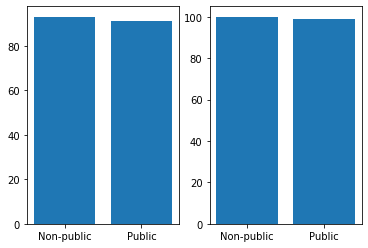

In [19]:
x = test_scores['school_type']
y = test_scores['pretest']
plt.subplot(1, 2, 1)
plt.bar(x, y)
x = test_scores['school_type']
y = test_scores['posttest']
plt.subplot(1, 2, 2)
plt.bar(x, y)

In [20]:
test_scores.groupby('school_type').agg({'pretest':[max,min,'mean','mad'],'posttest':[max,min,'mean','mad']}).round(2)

pretest                     posttest                    
                max   min   mean    mad      max   min   mean    mad
school_type                                                         
Non-public     93.0  37.0  63.25   7.98    100.0  44.0  75.96   7.92
Public         91.0  22.0  52.07  10.85     99.0  32.0  64.02  11.19

In [21]:
test_scores.groupby('school_type').agg({'pretest':[max,min,'mean','mad'],'posttest':[max,min,'mean','mad']}).round(2)

pretest                     posttest                    
                max   min   mean    mad      max   min   mean    mad
school_type                                                         
Non-public     93.0  37.0  63.25   7.98    100.0  44.0  75.96   7.92
Public         91.0  22.0  52.07  10.85     99.0  32.0  64.02  11.19

<BarContainer object of 2133 artists>

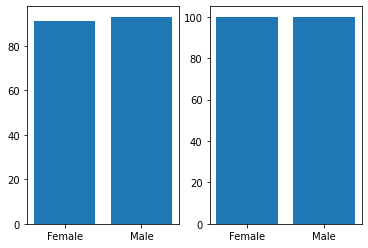

In [22]:
x = test_scores['gender']
y = test_scores['pretest']
plt.subplot(1, 2, 1)
plt.bar(x, y)
x = test_scores['gender']
y = test_scores['posttest']
plt.subplot(1, 2, 2)
plt.bar(x, y)

<BarContainer object of 2133 artists>

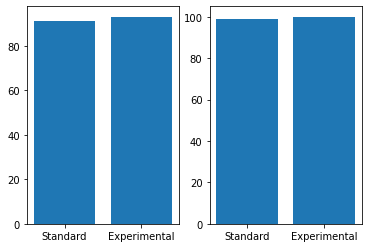

In [23]:
x = test_scores['teaching_method']
y = test_scores['pretest']
plt.subplot(1, 2, 1)
plt.bar(x, y)
x = test_scores['teaching_method']
y = test_scores['posttest']
plt.subplot(1, 2, 2)
plt.bar(x, y)

In [24]:
test_scores.groupby('teaching_method').agg({'pretest':[max,min,'mean','mad'],'posttest':[max,min,'mean','mad']}).round(2)

pretest                     posttest                    
                    max   min   mean    mad      max   min   mean    mad
teaching_method                                                         
Experimental       93.0  22.0  57.06  11.57    100.0  39.0  72.98  11.30
Standard           91.0  23.0  53.79  10.75     99.0  32.0  63.85  10.68

([0, 1], [Text(0, 0, ''), Text(0, 0, '')])

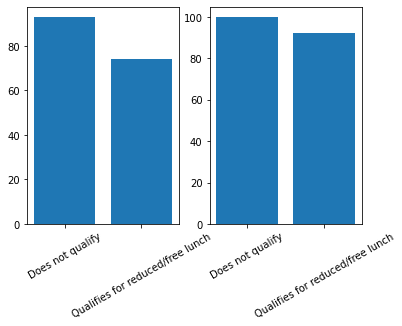

In [25]:
x = test_scores['lunch']
y = test_scores['pretest']
plt.subplot(1, 2, 1)
plt.bar(x, y)
plt.xticks(rotation=30)

x = test_scores['lunch']
y = test_scores['posttest']
plt.subplot(1, 2, 2)
plt.bar(x, y)
plt.xticks(rotation=30)

In [26]:
test_scores.groupby('lunch').agg({'pretest':[max,min,'mean','mad'],'posttest':[max,min,'mean','mad']}).round(2)

pretest                    posttest        \
                                     max   min   mean   mad      max   min   
lunch                                                                        
Does not qualify                    93.0  33.0  62.29  8.61    100.0  43.0   
Qualifies for reduced/free lunch    74.0  22.0  45.25  8.73     92.0  32.0   

                                               
                                   mean   mad  
lunch                                          
Does not qualify                  74.38  9.30  
Qualifies for reduced/free lunch  57.48  9.19

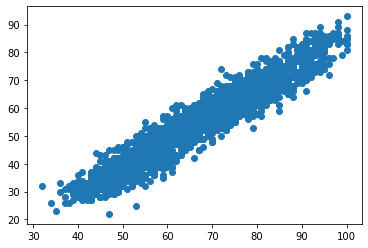

In [27]:
x = test_scores['posttest']
y = test_scores['pretest']
plt.scatter(x, y)

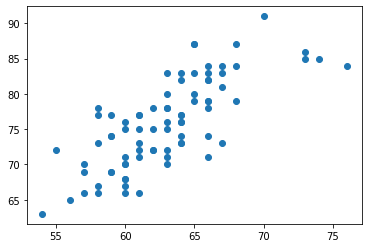

In [28]:
x = test_scores['pretest']
y = test_scores['posttest'] 

train_x = x[:80]
train_y = y[:80]

test_x = x[20:]
test_y = y[20:]

train_pred = np.poly1d(np.polyfit(train_x, train_y, 1))

plt.scatter(train_x, train_y)
plt.show()

In [29]:
relation = r2_score(train_y, train_pred(train_x))

print(relation)

0.5686430446526453


In [31]:
x = test_scores['pretest']
y = test_scores['posttest']

slope, intercept, r, p, std_err = stats.linregress(x, y)

def linregress_pred(x):
  return slope * x + intercept

print(r)

0.9508842857175765


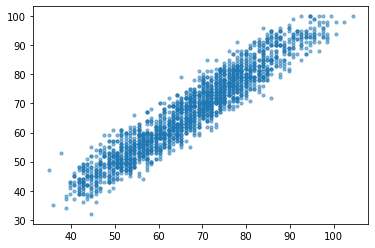

In [32]:
x = linregress_pred(test_scores['pretest'])
y = test_scores['posttest']
plt.scatter(x,y, alpha=0.5, s=10)


In [37]:
x = test_scores['pretest']
y = test_scores['posttest']

slope, intercept, r, p, std_err = stats.linregress(x, y)

def linregress_pred(x):
  return slope * x + intercept

print(r)

0.9508842857175765


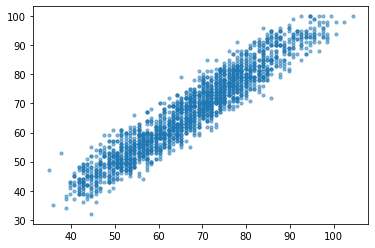

In [38]:
x = linregress_pred(test_scores['pretest'])
y = test_scores['posttest']
plt.scatter(x,y, alpha=0.5, s=10)

/Users/tjeff/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


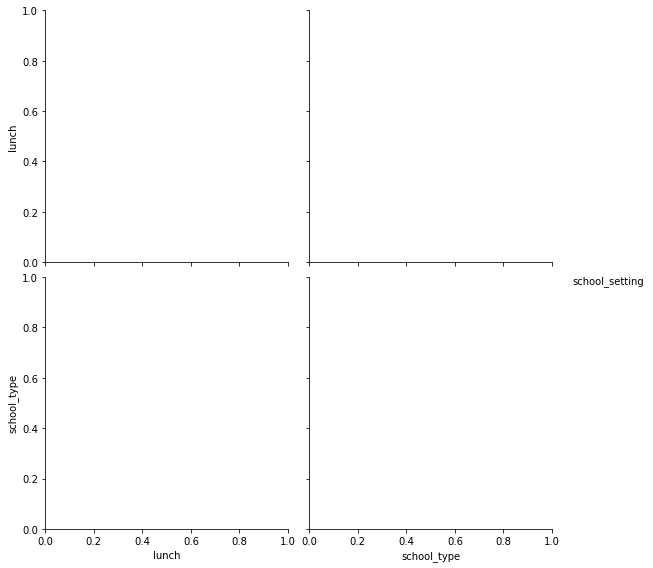

In [40]:
sns.pairplot(test_scores[test_scores['posttest'] >= 2000], 
             vars = ['lunch','school_type'], 
             hue = 'school_setting', diag_kind = 'kde', 
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             size = 4);
 
plt.suptitle('', 
             size = 28);